## Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as func
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import math

## Device Config

In [ ]:
device = torch.device("cude" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Hyperparameters define

In [ ]:
num_epochs= 5
batch_size = 100
lr = 0.001
input_size = 3*32*32 # 3*32*32 pixel size
hidden_size1 = 100
hidden_size2 = 100
hidden_size3 = 100
# num_classes = 10
output_size = 10


## Composed Tranform

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

## Import CIFAR10 Dataset

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train= True, download=True, transform = transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size,)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train= False, transform = transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


## Verify

In [ ]:
example = iter(train_loader)
# print(type(example))
sample, label = next(example)
print(sample.shape, label.shape)
sample = sample.view(-1, 3*32*32)
print(sample)
# for i in range(6):
#   plt.subplot(2, 3, i+1)
#   plt.imshow(sample[i][0])
#   print(label[i])

# plt.show()

torch.Size([100, 3, 32, 32]) torch.Size([100])
tensor([[-0.1686, -0.2078, -0.0039,  ...,  0.2000,  0.2078,  0.2549],
        [ 0.0902,  0.1216,  0.1294,  ..., -0.0902, -0.1059,  0.1843],
        [ 0.8667,  0.9608,  0.9765,  ...,  0.8353,  0.7647,  0.4902],
        ...,
        [-0.7176, -0.7098, -0.7255,  ..., -0.3569, -0.3725, -0.3725],
        [ 0.8902,  0.8667,  0.9294,  ..., -0.8118, -0.8196, -0.9373],
        [-0.3725, -0.5294, -0.5216,  ..., -0.4588, -0.4824, -0.4824]])


#-----------------------------------------------------------------------------------------------------------------------------

# Question 1: Utilize various activation functions like sigmoid, tanh and critique the performance in each case.

## Create a Neural Network with Sigmoid Activation funtion without vanish gradient problem

### Neural Netwrok With Sigmoid

In [ ]:
class NeuralNetSigmoid(nn.Module):
  def __init__(self, input_size, hidden_size1, output_size):
    super(NeuralNetSigmoid, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size1)
    self.sigmoid = nn.Sigmoid()
    self.l2 = nn.Linear(hidden_size1, output_size)


  def forward(self, x):
    x = x.view(-1, 32*32*3)
    out = self.l1(x)
    out = self.sigmoid(out)
    out = self.l2(out)
    return out


sigmoid_model = NeuralNetSigmoid(input_size=input_size, hidden_size1=hidden_size1, output_size=output_size)
sigmoid_model
# print(sigmoid_model.state_dict())

NeuralNetSigmoid(
  (l1): Linear(in_features=3072, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

### Loss function for sigmoid

In [ ]:
loss_sigmoid = nn.CrossEntropyLoss()
loss_sigmoid

CrossEntropyLoss()

### Optimizer function for sigmoid

In [ ]:
optimizer_sigmoid = torch.optim.SGD(sigmoid_model.parameters(), lr=lr)
optimizer_sigmoid

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Training Loop for sigmoid function

In [ ]:
n_step = len(train_loader)
sig_loss = []
sig_acc = []
sig_epoch = []

for epoch in range(num_epochs):
  sig_epoch.append(epoch+1)

  epoch_loss = 0.0
  epoch_acc = 0

  n_correct = 0 # number of correct prediction
  n_samples = 0 # number of total sample

  for i ,(image, label) in enumerate(train_loader):
    
    # image = image.reshape(-1,1024).to(device)
    image = image.to(device)
    label = label.to(device)

    # Forward pass
    label_predict = sigmoid_model(image)


    # Tracking correct predictions
    _, predict = torch.max(label_predict,1)
    n_samples += label.shape[0]
    n_correct += (predict == label).sum().item()

    # loss
    l = loss_sigmoid(label_predict, label)

    # backward
    optimizer_sigmoid.zero_grad()
    l.backward()

    # Upate weights
    optimizer_sigmoid.step()

    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{num_epochs} | step : {i+1}/{n_step} | loss : {l.item(): .4f}")


    # Store each epoch total loss
    epoch_loss += l.item()


    # Store each epoch total loss into empty list
  sig_loss.append(epoch_loss)

  # Accuracy calculation
  acc = 100.0*(n_correct/n_samples)
  sig_acc.append(acc)
  


print(sig_loss)

print(sig_acc)

epoch : 1/5 | step : 100/500 | loss :  2.3029
epoch : 1/5 | step : 200/500 | loss :  2.2553
epoch : 1/5 | step : 300/500 | loss :  2.2890
epoch : 1/5 | step : 400/500 | loss :  2.2344
epoch : 1/5 | step : 500/500 | loss :  2.2679
epoch : 2/5 | step : 100/500 | loss :  2.2511
epoch : 2/5 | step : 200/500 | loss :  2.2485
epoch : 2/5 | step : 300/500 | loss :  2.2345
epoch : 2/5 | step : 400/500 | loss :  2.2212
epoch : 2/5 | step : 500/500 | loss :  2.2121
epoch : 3/5 | step : 100/500 | loss :  2.1812
epoch : 3/5 | step : 200/500 | loss :  2.2175
epoch : 3/5 | step : 300/500 | loss :  2.1870
epoch : 3/5 | step : 400/500 | loss :  2.1751
epoch : 3/5 | step : 500/500 | loss :  2.1883
epoch : 4/5 | step : 100/500 | loss :  2.1666
epoch : 4/5 | step : 200/500 | loss :  2.1683
epoch : 4/5 | step : 300/500 | loss :  2.1757
epoch : 4/5 | step : 400/500 | loss :  2.1912
epoch : 4/5 | step : 500/500 | loss :  2.1979
epoch : 5/5 | step : 100/500 | loss :  2.1942
epoch : 5/5 | step : 200/500 | los

### Accuracy Calculation on test dataset

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for image, label in test_loader:
    image = image.to(device)
    label = label.to(device)

    output = sigmoid_model(image)

    # value, index
    _, predictions = torch.max(output, 1)
    n_samples += label.shape[0]
    n_correct += (predictions == label).sum().item()


  acc = 100.0 * (n_correct/n_samples)

print("Accuracy of Sigmoid : ",acc)

Accuracy of Sigmoid :  26.700000000000003


### Plot Graph

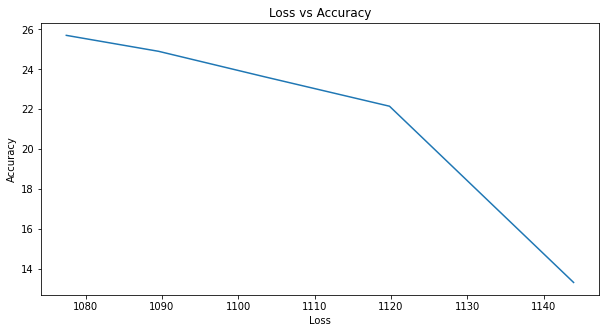

In [ ]:
# Convert list to numpy array
x = np.array(sig_loss)
y = np.array(sig_acc)
z = np.array(sig_epoch)
# chart show

# set chart Size
fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10)  

#plot 1: Loss vs Accuracy
plt.title("Loss vs Accuracy")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
# plt.subplot(1, 4, 1)
plt.plot(x,y)
plt.show()

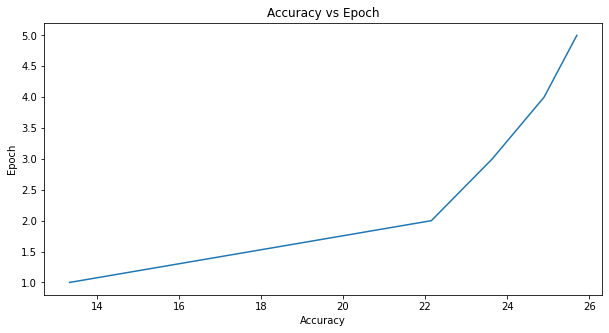

In [ ]:
#plot 2: Accuracy vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Accuracy vs Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 2)
plt.plot(y,z)
plt.show()

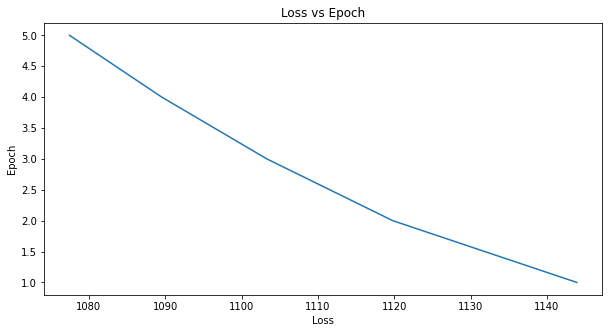

In [ ]:
#plot 3: Loss vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Loss vs Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 3)
plt.plot(x,z)

plt.show()

##-------------------------------------------------------------------------------------------------------------

## Neural Netrwork using tanh activation function without vanishing gradient problem

### Neural Network with tanh function

In [ ]:
class NeuralNetTanh(nn.Module):
  def __init__(self, input_size, hidden_size1, output_size):
    super(NeuralNetTanh, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size1)
    self.tanh = nn.Tanh()
    self.l2 = nn.Linear(hidden_size1, output_size)

  def forward(self, x):
    x = x.view(-1, 3*32*32)
    out = self.l1(x)
    out = self.tanh(out)
    out = self.l2(out)
    
    return out


tanh_model = NeuralNetTanh(input_size=input_size, hidden_size1=hidden_size1, output_size=output_size)
tanh_model

# print(tanh_model.state_dict())


NeuralNetTanh(
  (l1): Linear(in_features=3072, out_features=100, bias=True)
  (tanh): Tanh()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

### Loss function for tanh

In [ ]:
loss_tanh = nn.CrossEntropyLoss()
loss_tanh

CrossEntropyLoss()

### Optimizer function for tanh

In [ ]:
optimizer_tanh = torch.optim.SGD(tanh_model.parameters(), lr= lr)
optimizer_tanh

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Taining Loop for tanh

In [ ]:
n_steps = len(train_loader)
tanh_loss = []
tanh_acc = []
tanh_epoch = []


for epoch in range(num_epochs):
  tanh_epoch.append(epoch+1)
  
  epoch_loss = 0.0
  epoch_acc = 0


  n_correct = 0 # number of correct prediction
  n_samples = 0 # number of total sample

  for i, (image, label) in enumerate(train_loader):

    # If device uses GPU then store data to GPU
    image = image.to(device)
    label = label.to(device)
    
    # foraward pass
    output = tanh_model(image)

    # Tracking correct predictions
    _, predict = torch.max(output,1)
    n_samples += label.shape[0]
    n_correct += (predict == label).sum().item()


    # loss
    l = loss_tanh(output, label)

    # backward pass
    optimizer_tanh.zero_grad()

    l.backward()

    optimizer_tanh.step()


    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{num_epochs} | step : {i+1}/{n_step} | loss : {l.item(): .4f}")
    
    # Store each epoch total loss
    epoch_loss += l.item()

  # Store each epoch total loss into empty list
  tanh_loss.append(epoch_loss)

  # Accuracy calculation
  acc = 100.0*(n_correct/n_samples)
  tanh_acc.append(acc)
  


print(tanh_loss)

print(tanh_acc)

epoch : 1/5 | step : 100/500 | loss :  2.2230
epoch : 1/5 | step : 200/500 | loss :  2.1564
epoch : 1/5 | step : 300/500 | loss :  2.0876
epoch : 1/5 | step : 400/500 | loss :  2.0204
epoch : 1/5 | step : 500/500 | loss :  2.1645
epoch : 2/5 | step : 100/500 | loss :  1.9973
epoch : 2/5 | step : 200/500 | loss :  2.0320
epoch : 2/5 | step : 300/500 | loss :  1.9711
epoch : 2/5 | step : 400/500 | loss :  2.0302
epoch : 2/5 | step : 500/500 | loss :  1.9809
epoch : 3/5 | step : 100/500 | loss :  1.9844
epoch : 3/5 | step : 200/500 | loss :  1.9397
epoch : 3/5 | step : 300/500 | loss :  1.9016
epoch : 3/5 | step : 400/500 | loss :  2.0447
epoch : 3/5 | step : 500/500 | loss :  1.8973
epoch : 4/5 | step : 100/500 | loss :  1.9377
epoch : 4/5 | step : 200/500 | loss :  1.9381
epoch : 4/5 | step : 300/500 | loss :  1.8528
epoch : 4/5 | step : 400/500 | loss :  1.8996
epoch : 4/5 | step : 500/500 | loss :  2.0140
epoch : 5/5 | step : 100/500 | loss :  1.7833
epoch : 5/5 | step : 200/500 | los

### Plot Graph

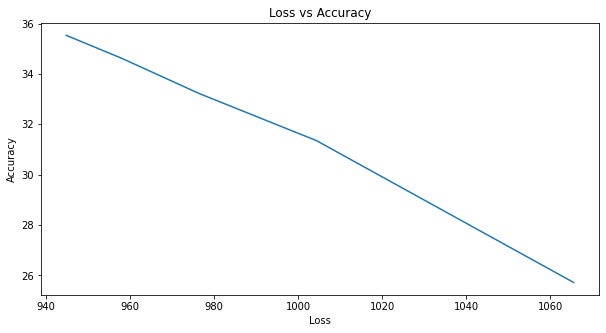

In [ ]:
# Convert list to numpy array
x = np.array(tanh_loss)
y = np.array(tanh_acc)
z = np.array(tanh_epoch)
# chart show

# set chart Size
fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10)  

#plot 1: Loss vs Accuracy
plt.title("Loss vs Accuracy")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
# plt.subplot(1, 4, 1)
plt.plot(x,y)
plt.show()



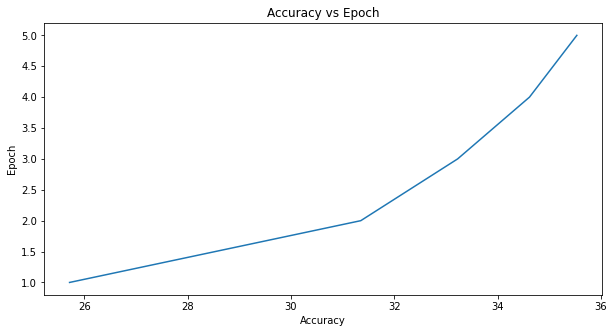

In [ ]:

#plot 2: Accuracy vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Accuracy vs Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 2)
plt.plot(y,z)
plt.show()

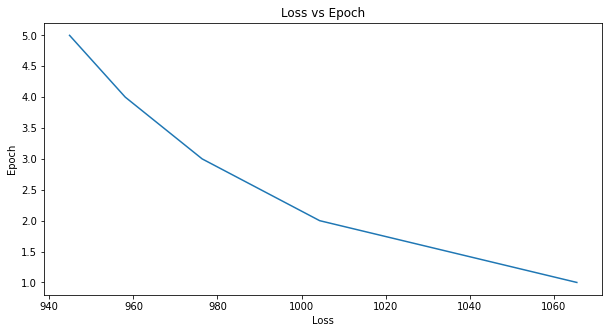

In [ ]:
#plot 3: Loss vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Loss vs Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 3)
plt.plot(x,z)

plt.show()

### Accuracy calculation

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for image,label in test_loader:
    image = image.to(device)
    label = label.to(device)

    output = tanh_model(image)

    _,predictions = torch.max(output, 1)
    n_samples += label.shape[0]
    n_correct += (predictions == label).sum().item()

  acc = 100.0*(n_correct/n_samples)

print("Accuracy of Tanh : ",acc)

Accuracy of Tanh :  36.02


#-----------------------------------------------------------------------------------------------------------------------------

# Question 2:Increase the depth of the given network by adding more Fully-Connected layers till the point you encounter the vanishing gradient problem. With the help of the results, mention how to identify it.

## Neural Network with Sigmoid activation function Which has vanish gradient problem

### Create Neural Network with Sigmoid function

In [ ]:
class NeuralNetSigmoidVanish(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    super(NeuralNetSigmoidVanish, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size1)
    self.sigmoid = nn.Sigmoid()
    self.l2 = nn.Linear(hidden_size1, hidden_size2)
    self.l3 = nn.Linear(hidden_size2, hidden_size3)
    self.l4 = nn.Linear(hidden_size3, output_size)


  def forward(self, x):
    x = x.view(-1, 32*32*3)
    out = self.l1(x)
    out = self.sigmoid(out)
    out = self.l2(out)
    out = self.sigmoid(out)
    out = self.l3(out)
    out = self.sigmoid(out)
    out = self.l4(out)

    return out


sigmoid_model_vanish = NeuralNetSigmoidVanish(input_size=input_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, hidden_size3=hidden_size3, output_size=output_size)
sigmoid_model_vanish
# print(sigmoid_model.state_dict())

NeuralNetSigmoidVanish(
  (l1): Linear(in_features=3072, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (l2): Linear(in_features=100, out_features=100, bias=True)
  (l3): Linear(in_features=100, out_features=100, bias=True)
  (l4): Linear(in_features=100, out_features=10, bias=True)
)

### Loss function for sigmoid

In [ ]:
loss_sigmoid = nn.CrossEntropyLoss()
loss_sigmoid

CrossEntropyLoss()

### Optimizer function for sigmoid

In [ ]:
optimizer_sigmoid = torch.optim.SGD(sigmoid_model_vanish.parameters(), lr=lr)
optimizer_sigmoid

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Training Loop for sigmoid function

In [ ]:
n_step = len(train_loader)
sig_loss = []
sig_acc = []
sig_epoch = []

for epoch in range(num_epochs):
  sig_epoch.append(epoch+1)

  epoch_loss = 0.0
  epoch_acc = 0

  n_correct = 0 # number of correct prediction
  n_samples = 0 # number of total sample

  for i ,(image, label) in enumerate(train_loader):
    
    # image = image.reshape(-1,1024).to(device)
    image = image.to(device)
    label = label.to(device)

    # Forward pass
    label_predict = sigmoid_model_vanish(image)


    # Tracking correct predictions
    _, predict = torch.max(label_predict,1)
    n_samples += label.shape[0]
    n_correct += (predict == label).sum().item()

    # loss
    l = loss_sigmoid(label_predict, label)

    # backward
    optimizer_sigmoid.zero_grad()
    l.backward()

    # Upate weights
    optimizer_sigmoid.step()

    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{num_epochs} | step : {i+1}/{n_step} | loss : {l.item(): .4f}")


    # Store each epoch total loss
    epoch_loss += l.item()


    # Store each epoch total loss into empty list
  sig_loss.append(epoch_loss)

  # Accuracy calculation
  acc = 100.0*(n_correct/n_samples)
  sig_acc.append(acc)
  


print(sig_loss)

print(sig_acc)

epoch : 1/5 | step : 100/500 | loss :  2.2897
epoch : 1/5 | step : 200/500 | loss :  2.3136
epoch : 1/5 | step : 300/500 | loss :  2.2977
epoch : 1/5 | step : 400/500 | loss :  2.3209
epoch : 1/5 | step : 500/500 | loss :  2.3103
epoch : 2/5 | step : 100/500 | loss :  2.3067
epoch : 2/5 | step : 200/500 | loss :  2.3020
epoch : 2/5 | step : 300/500 | loss :  2.3052
epoch : 2/5 | step : 400/500 | loss :  2.2998
epoch : 2/5 | step : 500/500 | loss :  2.3025
epoch : 3/5 | step : 100/500 | loss :  2.3028
epoch : 3/5 | step : 200/500 | loss :  2.3042
epoch : 3/5 | step : 300/500 | loss :  2.3024
epoch : 3/5 | step : 400/500 | loss :  2.3034
epoch : 3/5 | step : 500/500 | loss :  2.3030
epoch : 4/5 | step : 100/500 | loss :  2.3021
epoch : 4/5 | step : 200/500 | loss :  2.3026
epoch : 4/5 | step : 300/500 | loss :  2.3036
epoch : 4/5 | step : 400/500 | loss :  2.3036
epoch : 4/5 | step : 500/500 | loss :  2.3020
epoch : 5/5 | step : 100/500 | loss :  2.3024
epoch : 5/5 | step : 200/500 | los

### Accuracy Calculation on test dataset

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for image, label in test_loader:
    image = image.to(device)
    label = label.to(device)

    output = sigmoid_model(image)

    # value, index
    _, predictions = torch.max(output, 1)
    n_samples += label.shape[0]
    n_correct += (predictions == label).sum().item()


  acc = 100.0 * (n_correct/n_samples)

print("Accuracy of Sigmoid : ",acc)

Accuracy of Sigmoid :  26.700000000000003


### Plot Graph

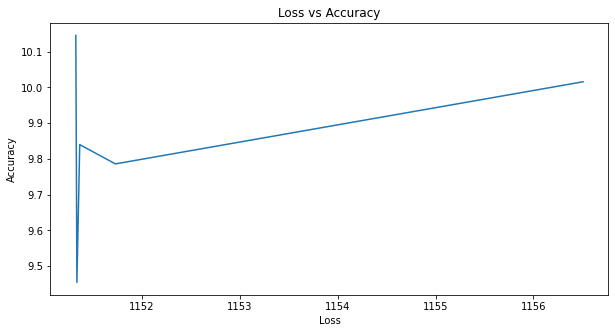

In [ ]:
# Convert list to numpy array
x = np.array(sig_loss)
y = np.array(sig_acc)
z = np.array(sig_epoch)
# chart show

# set chart Size
fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10)  

#plot 1: Loss vs Accuracy
plt.title("Loss vs Accuracy")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
# plt.subplot(1, 4, 1)
plt.plot(x,y)
plt.show()

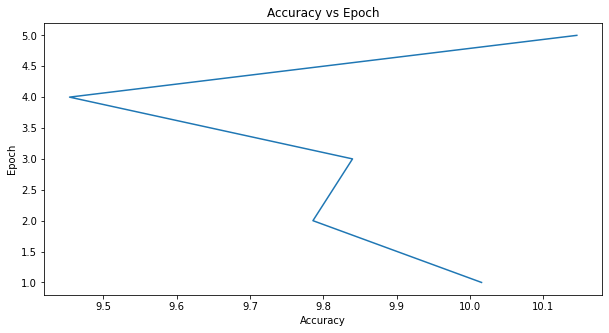

In [ ]:
#plot 2: Accuracy vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Accuracy vs Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 2)
plt.plot(y,z)
plt.show()

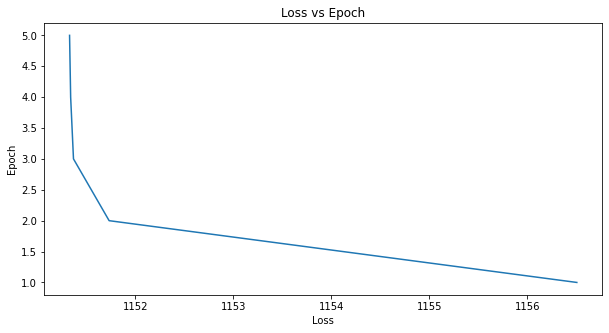

In [ ]:
#plot 3: Loss vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Loss vs Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 3)
plt.plot(x,z)

plt.show()

##-------------------------------------------------------------------------------------------------------------

## Neural Network using **tanh activation** function with vanishing gradient problem

### Neural Network with tanh

In [ ]:
class NeuralNetTanhVanish(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    super(NeuralNetTanhVanish, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size1)
    self.tanh = nn.Tanh()
    self.l2 = nn.Linear(hidden_size1, hidden_size2)
    self.l3 = nn.Linear(hidden_size2, hidden_size3)
    self.l4 = nn.Linear(hidden_size3, output_size)

  def forward(self, x):
    x = x.view(-1, 3*32*32)
    out = self.l1(x)
    out = self.tanh(out)
    out = self.l2(out)
    out = self.tanh(out)
    out = self.l3(out)
    out = self.tanh(out)
    out = self.l4(out)
    return out


tanh_model_vanish = NeuralNetTanhVanish(input_size=input_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, hidden_size3=hidden_size3, output_size=output_size)
tanh_model_vanish

# print(tanh_model.state_dict())

NeuralNetTanhVanish(
  (l1): Linear(in_features=3072, out_features=100, bias=True)
  (tanh): Tanh()
  (l2): Linear(in_features=100, out_features=100, bias=True)
  (l3): Linear(in_features=100, out_features=100, bias=True)
  (l4): Linear(in_features=100, out_features=10, bias=True)
)

### Tanh Loss with vanish gradient decent 

In [ ]:
loss = nn.CrossEntropyLoss()
loss

CrossEntropyLoss()

### Optimizer with tanh function

In [ ]:
optimizer = torch.optim.SGD(tanh_model_vanish.parameters(), lr=lr)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
n_steps = len(train_loader)
tanh_loss = []
tanh_acc = []
tanh_epoch = []


for epoch in range(num_epochs):
  tanh_epoch.append(epoch+1)
  
  epoch_loss = 0.0
  epoch_acc = 0


  n_correct = 0 # number of correct prediction
  n_samples = 0 # number of total sample

  for i, (image, label) in enumerate(train_loader):

    # If device uses GPU then store data to GPU
    image = image.to(device)
    label = label.to(device)
    
    # foraward pass
    output = tanh_model_vanish(image)

    # Tracking correct predictions
    _, predict = torch.max(output,1)
    n_samples += label.shape[0]
    n_correct += (predict == label).sum().item()


    # loss
    l = loss_tanh(output, label)

    # backward pass
    optimizer_tanh.zero_grad()

    l.backward()

    optimizer_tanh.step()


    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{num_epochs} | step : {i+1}/{n_step} | loss : {l.item(): .4f}")
    
    # Store each epoch total loss
    epoch_loss += l.item()

  # Store each epoch total loss into empty list
  tanh_loss.append(epoch_loss)

  # Accuracy calculation
  acc = 100.0*(n_correct/n_samples)
  tanh_acc.append(acc)
  


print(tanh_loss)

print(tanh_acc)

epoch : 1/5 | step : 100/500 | loss :  2.3111
epoch : 1/5 | step : 200/500 | loss :  2.3050
epoch : 1/5 | step : 300/500 | loss :  2.3123
epoch : 1/5 | step : 400/500 | loss :  2.3023
epoch : 1/5 | step : 500/500 | loss :  2.3056
epoch : 2/5 | step : 100/500 | loss :  2.3038
epoch : 2/5 | step : 200/500 | loss :  2.3141
epoch : 2/5 | step : 300/500 | loss :  2.2982
epoch : 2/5 | step : 400/500 | loss :  2.2992
epoch : 2/5 | step : 500/500 | loss :  2.3018
epoch : 3/5 | step : 100/500 | loss :  2.3080
epoch : 3/5 | step : 200/500 | loss :  2.3185
epoch : 3/5 | step : 300/500 | loss :  2.3062
epoch : 3/5 | step : 400/500 | loss :  2.2962
epoch : 3/5 | step : 500/500 | loss :  2.3004
epoch : 4/5 | step : 100/500 | loss :  2.3092
epoch : 4/5 | step : 200/500 | loss :  2.3107
epoch : 4/5 | step : 300/500 | loss :  2.3007
epoch : 4/5 | step : 400/500 | loss :  2.2969
epoch : 4/5 | step : 500/500 | loss :  2.3058
epoch : 5/5 | step : 100/500 | loss :  2.3060
epoch : 5/5 | step : 200/500 | los

### Accuracy calculation

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for image,label in test_loader:
    image = image.to(device)
    label = label.to(device)

    output = tanh_model(image)

    _,predictions = torch.max(output, 1)
    n_samples += label.shape[0]
    n_correct += (predictions == label).sum().item()

  acc = 100.0*(n_correct/n_samples)

print("Accuracy of Tanh : ",acc)

Accuracy of Tanh :  36.02


### Plot Graph

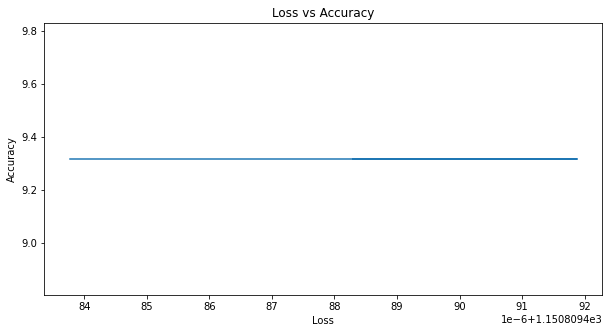

In [ ]:
# Convert list to numpy array
x = np.array(tanh_loss)
y = np.array(tanh_acc)
z = np.array(tanh_epoch)
# chart show

# set chart Size
fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10)  

#plot 1: Loss vs Accuracy
plt.title("Loss vs Accuracy")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
# plt.subplot(1, 4, 1)
plt.plot(x,y)
plt.show()



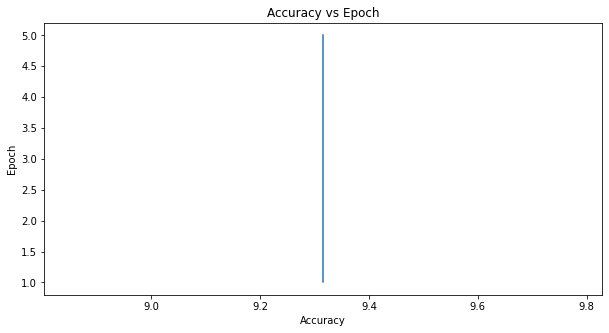

In [ ]:

#plot 2: Accuracy vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Accuracy vs Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 2)
plt.plot(y,z)
plt.show()

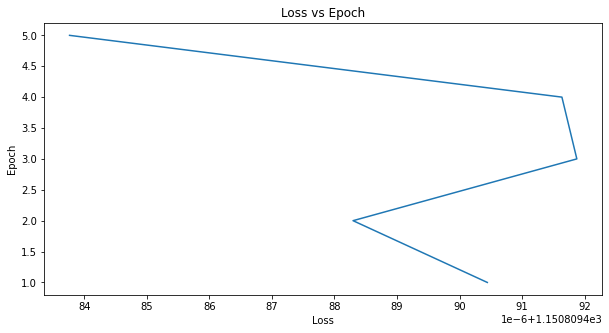

In [ ]:
#plot 3: Loss vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Loss vs Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 3)
plt.plot(x,z)

plt.show()

#-----------------------------------------------------------------------------------------------------------------------------

# Question 3:Suggest and implement methods to overcome the above problem.

## We can remove by using relu function

### Relu Neural Network

In [ ]:
class NeuralNetRelu(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    super(NeuralNetRelu, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size1)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size1, hidden_size2)
    self.l3 = nn.Linear(hidden_size2, hidden_size3)
    self.l4 = nn.Linear(hidden_size3, output_size)


  def forward(self, x):
    x = x.view(-1, 32*32*3)
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.relu(out)
    out = self.l3(out)
    out = self.relu(out)
    out = self.l4(out)

    return out


relu_model_vanish = NeuralNetRelu(input_size=input_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, hidden_size3=hidden_size3, output_size=output_size)
relu_model_vanish
# print(sigmoid_model.state_dict())

NeuralNetRelu(
  (l1): Linear(in_features=3072, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=100, bias=True)
  (l3): Linear(in_features=100, out_features=100, bias=True)
  (l4): Linear(in_features=100, out_features=10, bias=True)
)

### Loss function for Relu

In [ ]:
loss_relu = nn.CrossEntropyLoss()
loss_relu

CrossEntropyLoss()

### Optimizer function for sigmoid

In [ ]:
optimizer_relu = torch.optim.SGD(relu_model_vanish.parameters(), lr=lr)
optimizer_relu

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Training Loop for relu function

In [ ]:
n_step = len(train_loader)
relu_loss = []
relu_acc = []
relu_epoch = []

for epoch in range(num_epochs):
  relu_epoch.append(epoch+1)

  epoch_loss = 0.0
  epoch_acc = 0

  n_correct = 0 # number of correct prediction
  n_samples = 0 # number of total sample

  for i ,(image, label) in enumerate(train_loader):
    
    # image = image.reshape(-1,1024).to(device)
    image = image.to(device)
    label = label.to(device)

    # Forward pass
    label_predict = relu_model_vanish(image)


    # Tracking correct predictions
    _, predict = torch.max(label_predict,1)
    n_samples += label.shape[0]
    n_correct += (predict == label).sum().item()

    # loss
    l = loss_relu(label_predict, label)

    # backward
    optimizer_relu.zero_grad()
    l.backward()

    # Upate weights
    optimizer_relu.step()

    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{num_epochs} | step : {i+1}/{n_step} | loss : {l.item(): .4f}")


    # Store each epoch total loss
    epoch_loss += l.item()


    # Store each epoch total loss into empty list
  relu_loss.append(epoch_loss)

  # Accuracy calculation
  acc = 100.0*(n_correct/n_samples)
  relu_acc.append(acc)
  


print(relu_loss)

print(relu_acc)

epoch : 1/5 | step : 100/500 | loss :  2.3009
epoch : 1/5 | step : 200/500 | loss :  2.3033
epoch : 1/5 | step : 300/500 | loss :  2.3042
epoch : 1/5 | step : 400/500 | loss :  2.3025
epoch : 1/5 | step : 500/500 | loss :  2.2931
epoch : 2/5 | step : 100/500 | loss :  2.3002
epoch : 2/5 | step : 200/500 | loss :  2.2957
epoch : 2/5 | step : 300/500 | loss :  2.2934
epoch : 2/5 | step : 400/500 | loss :  2.2917
epoch : 2/5 | step : 500/500 | loss :  2.2885
epoch : 3/5 | step : 100/500 | loss :  2.2956
epoch : 3/5 | step : 200/500 | loss :  2.2987
epoch : 3/5 | step : 300/500 | loss :  2.2946
epoch : 3/5 | step : 400/500 | loss :  2.2833
epoch : 3/5 | step : 500/500 | loss :  2.2863
epoch : 4/5 | step : 100/500 | loss :  2.2733
epoch : 4/5 | step : 200/500 | loss :  2.2781
epoch : 4/5 | step : 300/500 | loss :  2.2841
epoch : 4/5 | step : 400/500 | loss :  2.2923
epoch : 4/5 | step : 500/500 | loss :  2.2760
epoch : 5/5 | step : 100/500 | loss :  2.2681
epoch : 5/5 | step : 200/500 | los

### Accuracy Calculation on test dataset

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for image, label in test_loader:
    image = image.to(device)
    label = label.to(device)

    output = relu_model_vanish(image)

    # value, index
    _, predictions = torch.max(output, 1)
    n_samples += label.shape[0]
    n_correct += (predictions == label).sum().item()


  acc = 100.0 * (n_correct/n_samples)

print("Accuracy of Relu : ",acc)

Accuracy of Relu :  16.509999999999998


### Plot Graph

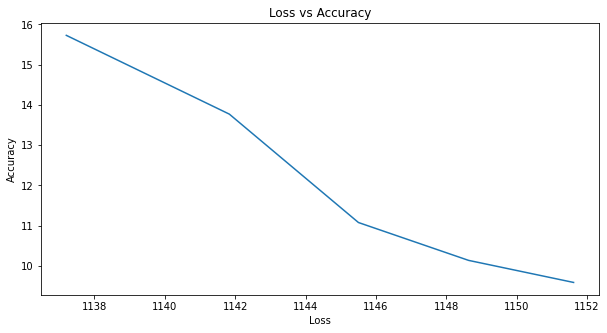

In [ ]:
# Convert list to numpy array
x = np.array(relu_loss)
y = np.array(relu_acc)
z = np.array(relu_epoch)
# chart show

# set chart Size
fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10)  

#plot 1: Loss vs Accuracy
plt.title("Loss vs Accuracy")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
# plt.subplot(1, 4, 1)
plt.plot(x,y)
plt.show()

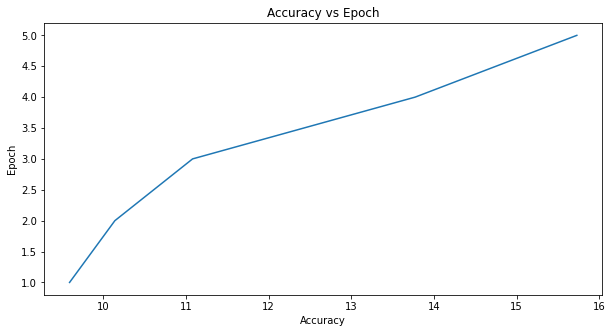

In [ ]:
#plot 2: Accuracy vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Accuracy vs Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 2)
plt.plot(y,z)
plt.show()

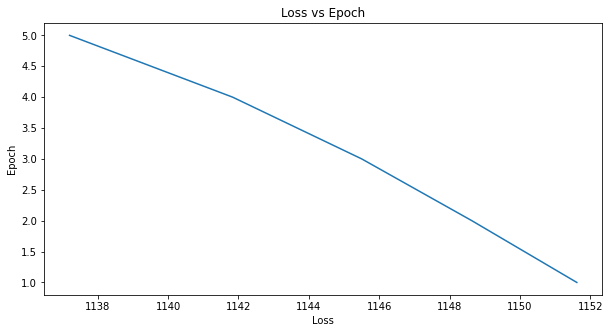

In [ ]:
#plot 3: Loss vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Loss vs Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 3)
plt.plot(x,z)

plt.show()

## We can also remove vanishing gradient problem by using Adam Optimizer instead of SGD

### Create Neural Network with Sigmoid function

In [ ]:
class NeuralNetSigmoidVanish(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    super(NeuralNetSigmoidVanish, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size1)
    self.sigmoid = nn.Sigmoid()
    self.l2 = nn.Linear(hidden_size1, hidden_size2)
    self.l3 = nn.Linear(hidden_size2, hidden_size3)
    self.l4 = nn.Linear(hidden_size3, output_size)


  def forward(self, x):
    x = x.view(-1, 32*32*3)
    out = self.l1(x)
    out = self.sigmoid(out)
    out = self.l2(out)
    out = self.sigmoid(out)
    out = self.l3(out)
    out = self.sigmoid(out)
    out = self.l4(out)

    return out


sigmoid_model_vanish = NeuralNetSigmoidVanish(input_size=input_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, hidden_size3=hidden_size3, output_size=output_size)
sigmoid_model_vanish
# print(sigmoid_model.state_dict())

NeuralNetSigmoidVanish(
  (l1): Linear(in_features=3072, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (l2): Linear(in_features=100, out_features=100, bias=True)
  (l3): Linear(in_features=100, out_features=100, bias=True)
  (l4): Linear(in_features=100, out_features=10, bias=True)
)

### Loss function for sigmoid

In [ ]:
loss_sigmoid = nn.CrossEntropyLoss()
loss_sigmoid

CrossEntropyLoss()

### Optimizer function for sigmoid

In [ ]:
optimizer_sigmoid = torch.optim.Adam(sigmoid_model_vanish.parameters(), lr=lr)
optimizer_sigmoid

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

### Training Loop for sigmoid function

In [ ]:
n_step = len(train_loader)
sig_loss = []
sig_acc = []
sig_epoch = []

for epoch in range(num_epochs):
  sig_epoch.append(epoch+1)

  epoch_loss = 0.0
  epoch_acc = 0

  n_correct = 0 # number of correct prediction
  n_samples = 0 # number of total sample

  for i ,(image, label) in enumerate(train_loader):
    
    # image = image.reshape(-1,1024).to(device)
    image = image.to(device)
    label = label.to(device)

    # Forward pass
    label_predict = sigmoid_model_vanish(image)


    # Tracking correct predictions
    _, predict = torch.max(label_predict,1)
    n_samples += label.shape[0]
    n_correct += (predict == label).sum().item()

    # loss
    l = loss_sigmoid(label_predict, label)

    # backward
    optimizer_sigmoid.zero_grad()
    l.backward()

    # Upate weights
    optimizer_sigmoid.step()

    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{num_epochs} | step : {i+1}/{n_step} | loss : {l.item(): .4f}")


    # Store each epoch total loss
    epoch_loss += l.item()


    # Store each epoch total loss into empty list
  sig_loss.append(epoch_loss)

  # Accuracy calculation
  acc = 100.0*(n_correct/n_samples)
  sig_acc.append(acc)
  


print(sig_loss)

print(sig_acc)

epoch : 1/5 | step : 100/500 | loss :  2.0314
epoch : 1/5 | step : 200/500 | loss :  1.9164
epoch : 1/5 | step : 300/500 | loss :  1.8963
epoch : 1/5 | step : 400/500 | loss :  1.9118
epoch : 1/5 | step : 500/500 | loss :  1.7524
epoch : 2/5 | step : 100/500 | loss :  1.8860
epoch : 2/5 | step : 200/500 | loss :  1.6935
epoch : 2/5 | step : 300/500 | loss :  1.6815
epoch : 2/5 | step : 400/500 | loss :  1.8151
epoch : 2/5 | step : 500/500 | loss :  1.5361
epoch : 3/5 | step : 100/500 | loss :  1.7547
epoch : 3/5 | step : 200/500 | loss :  1.7270
epoch : 3/5 | step : 300/500 | loss :  1.5735
epoch : 3/5 | step : 400/500 | loss :  1.5365
epoch : 3/5 | step : 500/500 | loss :  1.7187
epoch : 4/5 | step : 100/500 | loss :  1.5898
epoch : 4/5 | step : 200/500 | loss :  1.5667
epoch : 4/5 | step : 300/500 | loss :  1.6716
epoch : 4/5 | step : 400/500 | loss :  1.6341
epoch : 4/5 | step : 500/500 | loss :  1.3959
epoch : 5/5 | step : 100/500 | loss :  1.6125
epoch : 5/5 | step : 200/500 | los

### Accuracy Calculation on test dataset

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for image, label in test_loader:
    image = image.to(device)
    label = label.to(device)

    output = sigmoid_model(image)

    # value, index
    _, predictions = torch.max(output, 1)
    n_samples += label.shape[0]
    n_correct += (predictions == label).sum().item()


  acc = 100.0 * (n_correct/n_samples)

print("Accuracy of Sigmoid : ",acc)

Accuracy of Sigmoid :  26.700000000000003


### Plot Graph

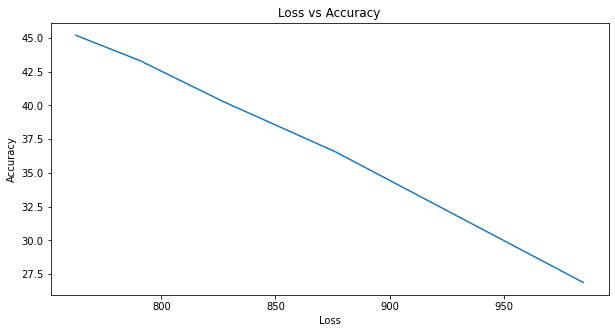

In [ ]:
# Convert list to numpy array
x = np.array(sig_loss)
y = np.array(sig_acc)
z = np.array(sig_epoch)
# chart show

# set chart Size
fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10)  

#plot 1: Loss vs Accuracy
plt.title("Loss vs Accuracy")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
# plt.subplot(1, 4, 1)
plt.plot(x,y)
plt.show()

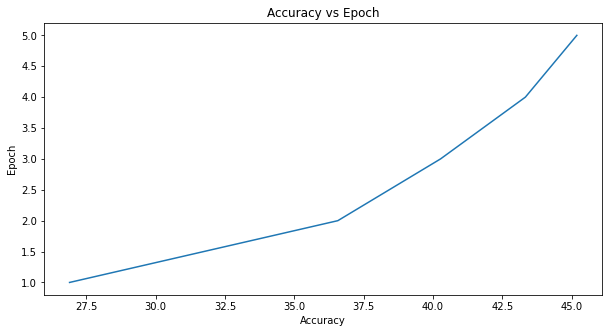

In [ ]:
#plot 2: Accuracy vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Accuracy vs Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 2)
plt.plot(y,z)
plt.show()

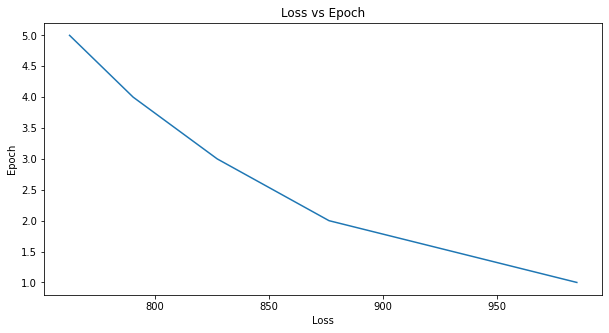

In [ ]:
#plot 3: Loss vs Epoch

fig = plt.figure()  
  
fig.set_figheight(5)  
fig.set_figwidth(10) 


plt.title("Loss vs Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
# plt.subplot(1, 4, 3)
plt.plot(x,z)

plt.show()